# LIWC analysis

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from source.conversation_helper import conversation_filter
from source.conversation_helper import test_tweet_text_only
from source.conversation_helper import build_tweet_text_only

In [5]:
ds = pd.read_csv('dataset/sampleconv.csv', 
                 dtype={
                     'id': np.int64,
                     'conversation_id': np.int64,
                     'screen_name': str,
                     'in_reply_to_status_id': object,
                     'text': str,
                     'num_child_replies': np.int32
                       })
ds.shape

(10805, 32)

In [6]:
ds.dtypes

id                           int64
screen_name                 object
name                        object
statuses_count               int64
followers_count              int64
friends_count                int64
favourites_count             int64
time_zone                   object
utc_offset                 float64
geo_enabled                   bool
location                    object
description                 object
latitude                   float64
longitude                  float64
place_type                  object
place_name                  object
place_full_name             object
place_country               object
retweet_count                int64
favorite_count               int64
retweeted                     bool
possibly_sensitive            bool
lang                        object
in_reply_to_status_id       object
in_reply_to_screen_name     object
created_at                  object
source                      object
text                        object
media_url           

In [7]:
ds = ds[ds.in_reply_to_status_id.isnull()]
ds.shape

(2000, 32)

In [8]:
ds = build_tweet_text_only(ds)
ds.shape

(2000, 34)

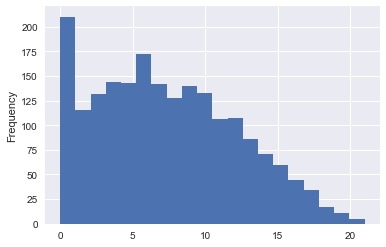

In [9]:
ds.text_only_num_tokens.plot.hist(bins=20)

In [10]:
liwc=ds[ds.text_only_num_tokens>0][['id', 'text_only']]
liwc.shape

(1864, 2)

In [11]:
liwc.sample(10)

,id,text_only
64,833886236037242880,tambin conoc una persona pens que llegara ser ...
3204,768174348482048000,quiero que acabe este semestre
8478,829147845701705728,Entregan patrulleros inteligentes para reforza...
2284,762489473590439936,Otra vez este pendejo
725,773323054466338816,estaban muy ocupados que dieron alarma pronta ...
271,768185128443056128,proteges ambiente aseguras futuro tus hijos
357,883169406645395458,Con Alfredo Arias mando Emelec para NINGN lado...
497,883141566147080192,Viva ROCK AmericaGuayaquil
3343,769936850081423360,Miren esto Conexin celulares Latinoamrica sus ...
9603,836433765614370817,janzo janzo jamonada


In [23]:
liwc.to_csv('dataset/sampleconvliwc.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)